# Transformation de variables numériques

La régression linéaire et logistique suppose que les variables sont distribuées normalement. S'ils ne le sont pas, on peut souvent appliquer une transformation mathématique pour changer leur distribution en gaussienne, et parfois même démasquer les relations linéaires entre les variables et leurs cibles. Cela signifie que la transformation des variables peut améliorer les performances des modèles linéaires d'apprentissage automatique. Les transformations mathématiques couramment utilisées comprennent les transformations de logarithme, réciproque, de puissance, de racine carrée et cubique, ainsi que les transformations de Box-Cox et Yeo-Johnson. Dans cet article, nous allons apprendre à implémenter toutes ces opérations sur les variables de notre ensemble de données à l'aide des bibliothèques NumPy, SciPy, scikit-learn et Feature-engine.

Cet article couvrira les recettes suivantes:

* Transformer des variables avec le logarithme
* Transformer des variables avec la fonction réciproque
* Utilisation de la racine carrée et cubique pour transformer des variables
* Transformations de puissance sur des variables numériques
* Transformation de Box-Cox sur des variables numériques
* Transformation de Yeo-Johnson sur des variables numériques

## Transformer des variables avec le logarithme

La fonction logarithme est couramment utilisée pour transformer des variables. Elle a un fort effet sur la forme de la distribution des variables et ne peut être appliquée qu'aux variables positives. Dans cette recette, nous allons apprendre à effectuer une transformation logarithmique à l'aide de NumPy, scikit-learn et Feature-engine. Nous allons également créer une fonction pour tracer la diagnostic pour évaluer l'effet de la transformation sur la distribution des variables

Commençons par importer les bibliothèques et les classes dont nous avons besoin et préparer l'ensemble de données:

In [1]:
!pip install feature_engine

     |████████████████████████████████| 179 kB 4.1 MB/s 
     |████████████████████████████████| 9.5 MB 49.9 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [3]:
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt

# for Q-Q plots
import scipy.stats as stats

# the dataset for the demo
from sklearn.datasets import load_boston

# with open-source packages
from sklearn.preprocessing import FunctionTransformer
from feature_engine.transformation import LogTransformer

In [4]:
# load the the Boston House price data from Scikit-learn

# this is how we load the boston dataset from sklearn
boston_dataset = load_boston()

# create a dataframe with the independent variables
data = pd.DataFrame(boston_dataset.data,
                      columns=boston_dataset.feature_names)

# display top 5 rows (not in book recipe)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


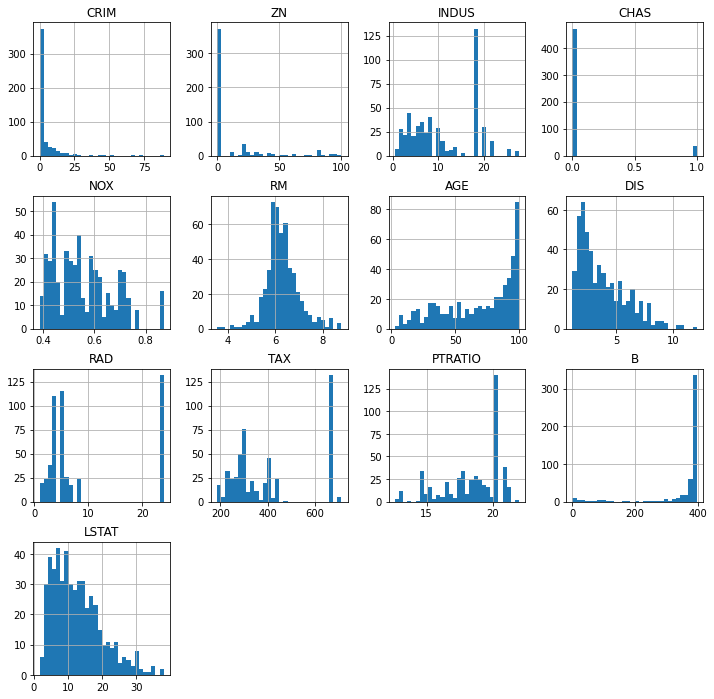

In [5]:
# plot the histogram to inspect variable distributions (not in book)

data.hist(bins=30, figsize=(12,12))
plt.show()

Pour évaluer l'effet de la transformation sur la distribution des variables, nous allons créer une fonction qui prend une dataframe et un nom de variable comme entrées et trace un histogramme à côté d'un Q-Q plot

In [6]:
# plot histogram and Q-Q plots to have a look at the variable distribution

def diagnostic_plots(df, variable):
    
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()

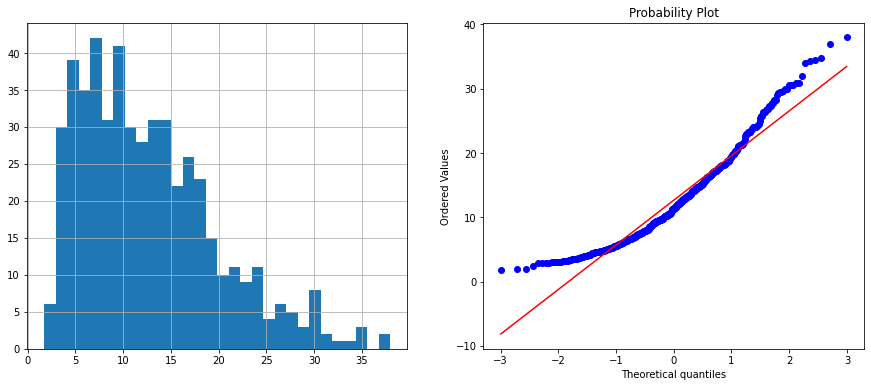

In [7]:
# check original distribution

diagnostic_plots(data, 'LSTAT')

### Logarithmic transformation with NumPy

In [8]:

# make a copy of the dataframe where we will store the modified
# variables

data_tf = data.copy()

Nous avons créé une copie afin de pouvoir modifier les valeurs dans la copie et non dans la base de données d'origine, dont nous avons besoin pour le reste de la recette

Appliquons la transformation logarithmique avec NumPy à un sous-ensemble de variables positives pour capturer les variables transformées dans la nouvelle base de données

In [9]:

# apply log to a set of variables
data_tf[['LSTAT', 'NOX', 'DIS', 'RM']] = np.log(
    data[['LSTAT', 'NOX', 'DIS', 'RM']])

Nous pouvons voir l'effet de la transformation dans la sortie suivante

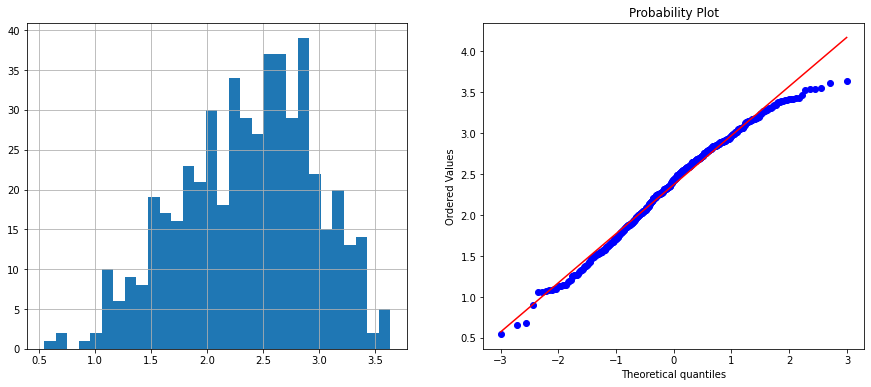

In [10]:
# use diagnostic plot function to address variable transformation

diagnostic_plots(data_tf, 'LSTAT')

### Logarithmic transformation with Scikit-learn

In [11]:
# start the transformer with NumPy log as argument
transformer = FunctionTransformer(np.log, validate=True)

In [12]:
# make a list of columns to transform
cols = ['LSTAT', 'NOX', 'DIS', 'RM']

# transform subset of dataframe
data_tf = transformer.transform(data[cols])

In [13]:
# capture returned NumPy array in pandas dataframe
data_tf = pd.DataFrame(data_tf, columns=cols)

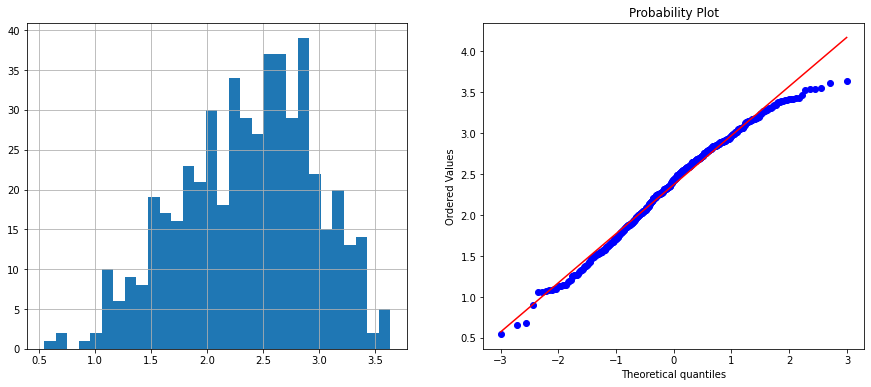

In [14]:

# use diagnostic plot function to evaluate transformation
# (not in book)
diagnostic_plots(data_tf, 'LSTAT')

### Logarithmic transformation with Feature-engine

In [15]:
# initialize the transformer
lt = LogTransformer(variables=['LSTAT', 'NOX', 'DIS', 'RM'])

# fit transformer to data set
lt.fit(data)

LogTransformer(base='e', variables=['LSTAT', 'NOX', 'DIS', 'RM'])

#

In [16]:
# transform variables within our data set
data_tf = lt.transform(data)

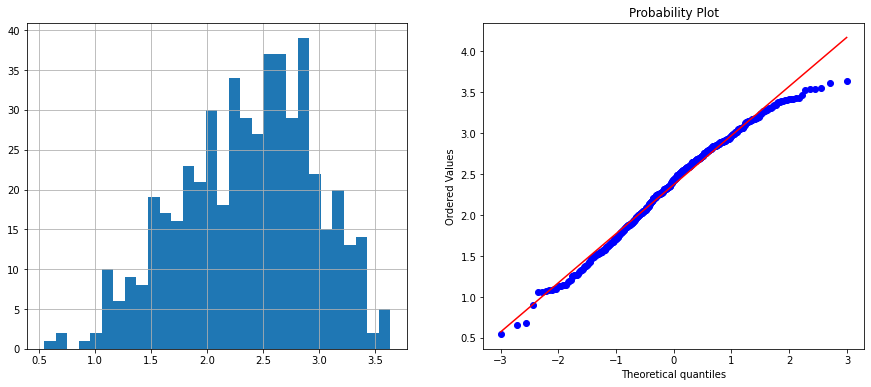

In [17]:
# use diagnostic plot function to evaluate transformation
# (not in book)

diagnostic_plots(data_tf, 'LSTAT')

### Logarithm with Scikit-learn selecting a group of variables

In [18]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_boston

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [19]:
# load data set
boston_dataset = load_boston()

# create a dataframe with the independent variables
data = pd.DataFrame(boston_dataset.data,
                    columns=boston_dataset.feature_names)

In [20]:
# list of variables to transform
cols = ['LSTAT', 'NOX', 'DIS', 'RM']

# set transformer within a pipeline
log_transformer = Pipeline(steps=[('log_transformer',
                                   FunctionTransformer(np.log, validate=True))])

# set pipeline within ColumnTransformer to select features
preprocessor = ColumnTransformer(transformers=[
    ('log_transformer', log_transformer, cols)], remainder='passthrough')

In [21]:
# fit to the data (the entire dataframe this time)
preprocessor.fit(data)

# transform the data
data_tf = preprocessor.transform(data)